# TF-IDF with Multi-Layer Perceptron (MLP) for Multi-Class Classification

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical

# Load training and testing data
train_df = pd.read_csv('/content/drive/MyDrive/MedDataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MedDataset/validation.csv')

required_cols = ["question", "opa", "opb", "opc", "opd", "cop"]

train_df = train_df.dropna(subset=required_cols).reset_index(drop=True)
test_df = test_df.dropna(subset=required_cols).reset_index(drop=True)


# train_df.info()
# test_df.info()


# Combine question + options into one input
train_df["full_text"] = train_df["question"] + " " + train_df["opa"] + " " + train_df["opb"] + " " + train_df["opc"] + " " + train_df["opd"]
test_df["full_text"] = test_df["question"] + " " + test_df["opa"] + " " + test_df["opb"] + " " + test_df["opc"] + " " + test_df["opd"]

# Labels
y_train_raw = train_df["cop"].astype(int).values
y_test_raw = test_df["cop"].astype(int).values

# TF-IDF vectorization (fit on train only, transform both)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df["full_text"]).toarray()
X_test = vectorizer.transform(test_df["full_text"]).toarray()

# One-hot encode labels
y_train = to_categorical(y_train_raw, num_classes=4)
y_test = to_categorical(y_test_raw, num_classes=4)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',      # Track validation accuracy
    patience=3,                  # Stop after 3 epochs without meaningful improvement
    min_delta=0.001,             # Require at least 0.1% improvement
    restore_best_weights=True   # Restore the best model (not the last one)
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3222 - loss: 1.3588 - val_accuracy: 0.3704 - val_loss: 1.3210
Epoch 2/100
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4540 - loss: 1.2249 - val_accuracy: 0.4337 - val_loss: 1.2581
Epoch 3/100
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6143 - loss: 0.9648 - val_accuracy: 0.4795 - val_loss: 1.2359
Epoch 4/100
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7264 - loss: 0.7235 - val_accuracy: 0.4984 - val_loss: 1.2686
Epoch 5/100
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7917 - loss: 0.5639 - val_accuracy: 0.5094 - val_loss: 1.3417
Epoch 6/100
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8301 - loss: 0.4652 - val_accuracy: 0.5146 - val_loss: 1.4231
Epoch 7/100
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8586 - loss: 0.3942 - val_accuracy: 0.5210 - val_loss: 1.5007
Epoch 8/100
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8782 - loss: 

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy on validation.csv: {accuracy:.3f}")


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3037 - loss: 2.5061

✅ Final Test Accuracy on validation.csv: 0.304


## SentenceTransformer + MLP

In [13]:

!pip install -q sentence-transformers transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.0 MB/s eta 0:00:00


In [21]:
# Step 2: Imports
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, class_weight
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

In [22]:
# ────────────────────────────────────────────────────────────
# Step 3 · Load  ➜  Clean  ➜  Balance  ➜  Split  ➜  Prep text & labels
# ────────────────────────────────────────────────────────────
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 1. Load CSVs
train_df = pd.read_csv('/content/drive/MyDrive/MedDataset/train.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/MedDataset/validation.csv')

# 2. Drop rows with any missing required field
required_cols = ["question", "opa", "opb", "opc", "opd", "cop"]
train_df = train_df.dropna(subset=required_cols).reset_index(drop=True)
test_df  = test_df.dropna(subset=required_cols).reset_index(drop=True)

# 3. Balance the TRAIN set by down-sampling to the size of the smallest class
dfs = [train_df[train_df["cop"] == c] for c in sorted(train_df["cop"].unique())]
min_count = min(len(df) for df in dfs)

balanced_train_df = pd.concat([
    resample(df, replace=False, n_samples=min_count, random_state=42)
    for df in dfs
]).reset_index(drop=True)

print("Balanced class counts:\n", balanced_train_df["cop"].value_counts(), "\n")

# 4. Stratified 80/20 split from the balanced set
train_split_df, val_split_df = train_test_split(
    balanced_train_df,
    test_size=0.20,
    stratify=balanced_train_df["cop"],
    random_state=42
)

# 5. Build the full_text column required by Sentence-Transformers
for df in (train_split_df, val_split_df, test_df):
    df["full_text"] = (
        df["question"] + " " + df["opa"] + " " + df["opb"] + " "
        + df["opc"] + " " + df["opd"]
    )

# 6. One-hot labels
y_train = to_categorical(train_split_df["cop"].values, num_classes=4)
y_val   = to_categorical(val_split_df["cop"].values,   num_classes=4)
y_test  = to_categorical(test_df["cop"].values,        num_classes=4)

print("Shapes —  train:", train_split_df.shape,
      " val:", val_split_df.shape,
      " test:", test_df.shape)


Balanced class counts:
 cop
0    38658
1    38658
2    38658
3    38658
Name: count, dtype: int64 

Shapes —  train: (123705, 12)  val: (30927, 12)  test: (4142, 12)


In [23]:
# ────────────────────────────────────────────────────────────
# Step 4  · BERT embeddings for train / val / test
# ────────────────────────────────────────────────────────────
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
bert = SentenceTransformer(model_name)

X_train = bert.encode(
    train_split_df["full_text"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True
)
X_val = bert.encode(
    val_split_df["full_text"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True
)
X_test = bert.encode(
    test_df["full_text"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True
)



Batches:   0%|          | 0/3866 [00:00<?, ?it/s]

Batches:   0%|          | 0/967 [00:00<?, ?it/s]

Batches:   0%|          | 0/130 [00:00<?, ?it/s]

In [24]:
# [18]  ───────────────────────────────────────────────────────
# Step 5: Define and train MLP with class weights
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ── NEW: class-balanced weighting so the loss treats each class equally
int_labels_for_weights = train_split_df["cop"].values        # <<< changed
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(int_labels_for_weights),
    y=int_labels_for_weights
)
class_weights = dict(enumerate(weights))                     # <<< changed
print("Class weights:", class_weights)

early_stop = EarlyStopping(
    monitor='val_accuracy', patience=5, min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),      # <<< changed
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,          # <<< changed
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Class weights: {0: np.float64(1.0000080838129728), 1: np.float64(0.9999757493452324), 2: np.float64(1.0000080838129728), 3: np.float64(1.0000080838129728)}
Epoch 1/100
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.2711 - loss: 1.3829 - val_accuracy: 0.2972 - val_loss: 1.3736
Epoch 2/100
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3046 - loss: 1.3706 - val_accuracy: 0.3050 - val_loss: 1.3689
Epoch 3/100
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3245 - loss: 1.3580 - val_accuracy: 0.3155 - val_loss: 1.3659
Epoch 4/100
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3455 - loss: 1.3416 - val_accuracy: 0.3270 - val_loss: 1.3578
Epoch 5/100
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3689 - loss: 1.3190 - val_accuracy: 0.3389 - val_loss: 1.3529
Epoch 6/100
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3902 - loss: 1.2957 - val_accuracy: 0.3410 - val_loss: 1.3508
Epoch 7/100
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - 


✅ Overall test accuracy: 0.282

Classification report (macro-averaged F1 shown at bottom):
              precision    recall  f1-score   support

           0      0.359     0.285     0.317      1335
           1      0.281     0.303     0.292      1070
           2      0.248     0.237     0.242       912
           3      0.236     0.303     0.265       825

    accuracy                          0.282      4142
   macro avg      0.281     0.282     0.279      4142
weighted avg      0.290     0.282     0.284      4142



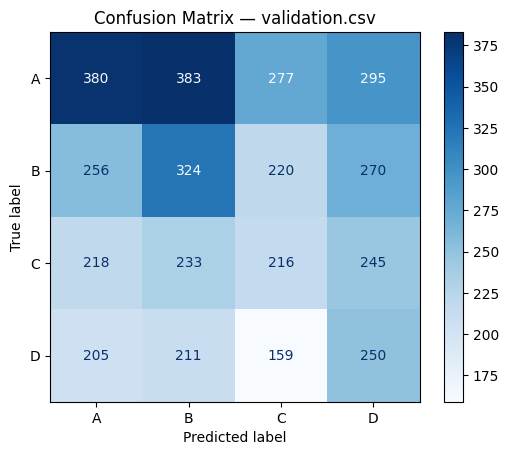

In [25]:
# [19]  ───────────────────────────────────────────────────────
# Step 6: Final evaluation + per-class metrics + confusion matrix
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Overall test accuracy: {acc:.3f}")

# Convert one-hot back to integers
y_true = np.argmax(y_test,  axis=1)
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

print("\nClassification report (macro-averaged F1 shown at bottom):")
print(classification_report(y_true, y_pred, digits=3))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['A','B','C','D'])
disp.plot(cmap="Blues", xticks_rotation=0)
plt.title("Confusion Matrix — validation.csv")
plt.show()


## **SentenceTransformer + Binary Classifier**

**Step 1: Reformat your dataset**

rows = []
for _, row in df.iterrows():
    for i, opt in enumerate(["opa", "opb", "opc", "opd"]):
        rows.append({
            "question": row["question"],
            "option": row[opt],
            "label": int(row["cop"] == i)  # 1 if correct, else 0
        })
df_binary = pd.DataFrame(rows)

**Step 2: Train a binary classifier**
Input: question + option

Output: 0 or 1 (is this option correct?)

**Step 3: Inference**
For each question, get scores for all 4 options.

Choose the one with the highest score.



In [26]:
import pandas as pd

# Load files
train_df = pd.read_csv('/content/drive/MyDrive/MedDataset/train.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/MedDataset/validation.csv')

required_cols = ["question", "opa", "opb", "opc", "opd", "cop"]
train_df = train_df.dropna(subset=required_cols).reset_index(drop=True)
test_df  = test_df.dropna(subset=required_cols).reset_index(drop=True)

# Function to convert MCQ row to binary format
def convert_to_binary(df):
    rows = []
    for _, row in df.iterrows():
        for i, opt in enumerate(["opa", "opb", "opc", "opd"]):
            rows.append({
                "question": row["question"],
                "option": row[opt],
                "label": int(row["cop"] == i)
            })
    return pd.DataFrame(rows)

train_bin_df = convert_to_binary(train_df)
test_bin_df  = convert_to_binary(test_df)


In [27]:
from sentence_transformers import SentenceTransformer

bert = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Combine question + option
train_bin_df["input_text"] = train_bin_df["question"] + " " + train_bin_df["option"]
test_bin_df["input_text"]  = test_bin_df["question"]  + " " + test_bin_df["option"]

# Get embeddings
X_train = bert.encode(train_bin_df["input_text"].tolist(), convert_to_numpy=True, show_progress_bar=True)
y_train = train_bin_df["label"].values

X_test = bert.encode(test_bin_df["input_text"].tolist(), convert_to_numpy=True, show_progress_bar=True)
y_test = test_bin_df["label"].values


Batches:   0%|          | 0/22509 [00:00<?, ?it/s]

Batches:   0%|          | 0/518 [00:00<?, ?it/s]

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat  = to_categorical(y_test,  num_classes=2)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
10129/10129 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7487 - loss: 0.5663 - val_accuracy: 0.7500 - val_loss: 0.5624
Epoch 2/30
10129/10129 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7496 - loss: 0.5630 - val_accuracy: 0.7500 - val_loss: 0.5622
Epoch 3/30
10129/10129 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7499 - loss: 0.5624 - val_accuracy: 0.7500 - val_loss: 0.5622
Epoch 4/30
10129/10129 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7494 - loss: 0.5630 - val_accuracy: 0.7500 - val_loss: 0.5620


In [29]:
import numpy as np

def predict_option(question, options):
    inputs = [question + " " + opt for opt in options]
    embs = bert.encode(inputs, convert_to_numpy=True)
    probs = model.predict(embs, verbose=0)
    return np.argmax(probs[:, 1])  # Return index with highest prob of label=1

# Example test case:
row = test_df.iloc[0]
predicted_index = predict_option(
    row["question"],
    [row["opa"], row["opb"], row["opc"], row["opd"]]
)
print("Predicted:", ["A", "B", "C", "D"][predicted_index], "Actual:", ["A", "B", "C", "D"][row["cop"]])


Predicted: A Actual: A


In [30]:
correct = 0
for _, row in test_df.iterrows():
    pred = predict_option(
        row["question"],
        [row["opa"], row["opb"], row["opc"], row["opd"]]
    )
    if pred == row["cop"]:
        correct += 1

accuracy = correct / len(test_df)
print(f"\n✅ Final Test Accuracy on validation.csv: {accuracy:.3f}")



✅ Final Test Accuracy on validation.csv: 0.261


In [ ]:
# import pandas as pd
# import numpy as np
# from transformers import AutoTokenizer, AutoModel
# import torch
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Input
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.regularizers import l2
# from sklearn.model_selection import train_test_split
# from sklearn.utils import class_weight
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# from itertools import product

# # Load datasets
# train_df = pd.read_csv('/content/drive/MyDrive/MedDataset/train.csv')
# test_df = pd.read_csv('/content/drive/MyDrive/MedDataset/validation.csv')

# # Drop rows with missing required fields
# required_cols = ["question", "opa", "opb", "opc", "opd", "cop"]
# train_df = train_df.dropna(subset=required_cols).reset_index(drop=True)
# test_df = test_df.dropna(subset=required_cols).reset_index(drop=True)

# # Create full_text column for PubMedBERT
# train_df["full_text"] = train_df["question"] + " " + train_df["opa"] + " " + train_df["opb"] + " " + train_df["opc"] + " " + train_df["opd"]
# test_df["full_text"] = test_df["question"] + " " + test_df["opa"] + " " + test_df["opb"] + " " + test_df["opc"] + " " + test_df["opd"]

# # One-hot encode labels
# y_train = to_categorical(train_df["cop"].values, num_classes=4)
# y_test = to_categorical(test_df["cop"].values, num_classes=4)

# # Load PubMedBERT
# tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract")
# model = AutoModel.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract")

# # Function to get PubMedBERT embeddings
# def get_pubmedbert_embeddings(texts, batch_size=32):
#     embeddings = []
#     for i in range(0, len(texts), batch_size):
#         batch_texts = texts[i:i + batch_size]
#         inputs = tokenizer(batch_texts, return_tensors="pt", max_length=512, truncation=True, padding=True)
#         with torch.no_grad():
#             outputs = model(**inputs)
#         # Use [CLS] token embedding (first token)
#         batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
#         embeddings.append(batch_embeddings)
#     return np.vstack(embeddings)

# # Generate embeddings
# print("Generating PubMedBERT embeddings for training data...")
# X_train = get_pubmedbert_embeddings(train_df["full_text"].tolist())
# print("Generating PubMedBERT embeddings for test data...")
# X_test = get_pubmedbert_embeddings(test_df["full_text"].tolist())

# # Split training data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# # Compute class weights
# int_labels = np.argmax(y_train, axis=1)
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(int_labels), y=int_labels)
# class_weights_dict = dict(enumerate(class_weights))
# print("Class weights:", class_weights_dict)

# # Hyperparameter grid
# param_grid = {
#     'learning_rate': [0.001, 0.0001],
#     'batch_size': [32, 64],
#     'dropout_rate': [0.5],
#     'l2_lambda': [0.01, 0.001]
# }



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generating PubMedBERT embeddings for training data...


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [1]:
import tensorflow as tf

In [9]:

# # Function to build model
# def build_model(learning_rate, dropout_rate, l2_lambda):
#     model = Sequential([
#         Input(shape=(X_train.shape[1],)),
#         Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)),
#         Dropout(dropout_rate),
#         Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),
#         Dropout(dropout_rate),
#         Dense(4, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Grid search
# best_val_acc = 0
# best_params = None
# best_model = None

# for lr, bs, dr, l2_l in product(param_grid['learning_rate'], param_grid['batch_size'],
#                                 param_grid['dropout_rate'], param_grid['l2_lambda']):
#     print(f"\nTrying lr={lr}, batch_size={bs}, dropout={dr}, l2_lambda={l2_l}")
#     model = build_model(lr, dr, l2_l)

#     early_stop = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001,
#                               restore_best_weights=True)

#     history = model.fit(
#         X_train, y_train,
#         validation_data=(X_val, y_val),
#         epochs=50,
#         batch_size=bs,
#         callbacks=[early_stop],
#         class_weight=class_weights_dict,
#         verbose=1
#     )

#     val_acc = max(history.history['val_accuracy'])
#     if val_acc > best_val_acc:
#         best_val_acc = val_acc
#         best_params = {'learning_rate': lr, 'batch_size': bs, 'dropout_rate': dr, 'l2_lambda': l2_l}
#         best_model = model

# print("\nBest parameters:", best_params)
# print("Best validation accuracy:", best_val_acc)

# # Evaluate on test set
# loss, acc = best_model.evaluate(X_test, y_test, verbose=0)
# print(f"\n✅ Overall test accuracy: {acc:.3f}")

# # Classification report and confusion matrix
# y_true = np.argmax(y_test, axis=1)
# y_pred = np.argmax(best_model.predict(X_test, verbose=0), axis=1)

# print("\nClassification report:")
# print(classification_report(y_true, y_pred, digits=3, target_names=['A', 'B', 'C', 'D']))

# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(cm, display_labels=['A', 'B', 'C', 'D'])
# disp.plot(cmap="Blues", xticks_rotation=0)
# plt.title("Confusion Matrix — validation.csv")
# plt.show()



Trying lr=0.001, batch_size=32, dropout=0.5, l2_lambda=0.01


NameError: name 'X_train' is not defined